In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
def sigmoid_function(f_wb): #function to convert w*x+b into the sigmoid function , its value cahnegs between  1 and zero(0)
    sig=1/(1+np.exp(-f_wb))
    return sig

In [5]:
x_path = r'C:\Users\pawnk\OneDrive\Desktop\x_train.csv'
x_train = np.genfromtxt(x_path, delimiter=',')  
y_path = r'C:\Users\pawnk\OneDrive\Desktop\y_train.csv'
y_train = np.genfromtxt(y_path) 
print(x_train.shape,y_train.shape)
print(x_train[:3])

(889, 7) (889,)
[[1.         0.         0.27117366 0.125      0.         0.01415106
  0.        ]
 [0.         1.         0.4722292  0.125      0.         0.13913574
  0.5       ]
 [1.         1.         0.32143755 0.         0.         0.01546857
  0.        ]]


(1000, 7) (1000,)


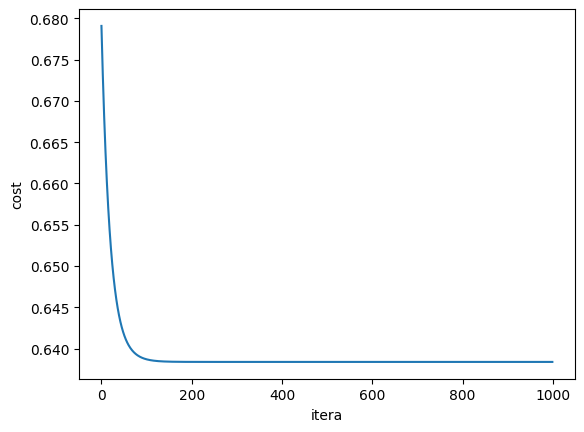

368.387154340744
fuck


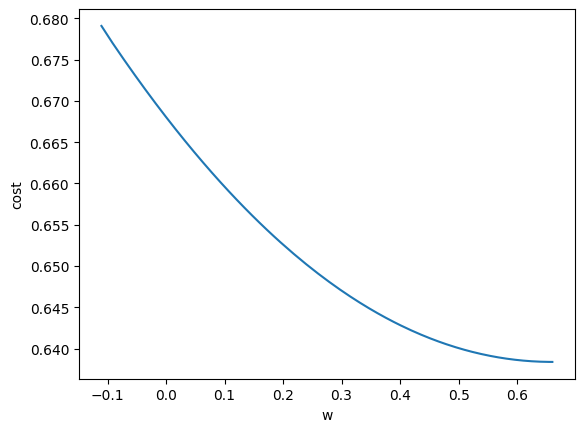

(418,)
Predicted Probability (using final iteration): (418,)
76.55502392344498


In [73]:
itera=1000
alfa=0.9
w=np.array([0,0,0,0,0,0,0])
b=0
cost_,w_,b_=gradient_descent(x_train,y_train,w,b,alfa,itera)
w_2d=w_.reshape(-1,7)
print(w_2d.shape,b_.shape)
first_column=w_2d[:,0]#shapping to send to plot function
plot_loss(cost_,itera)
plot_data(w_2d,cost_)
predict()

In [6]:
def cost_function(x,y,w,b): #calculate error for each value of w and b
    cost=0.0
    m,n=x.shape
    z=np.dot(x,w)+b
    f_wb=sigmoid_function(z)
    cost=cost-y*np.log(f_wb)-(1-y)*np.log(1-f_wb)
    cost=np.sum(cost)/m
    return cost

In [7]:
def grad_derivation(x,y,w,b):#function to minimize the error.
    m,n=x.shape 
    y_value=np.dot(x,w)+b # calculate dot product on straight line 
    y_sigmoid=sigmoid_function(y_value)  #calculate sigmoid function 
    cost=y_sigmoid-y #calculate error
    w_der=(1/m)*np.sum(x.T@cost) #derivative calculation with respect to w
    b_der=(1/m)*np.sum(cost) #derivative calculation with respecr to b_value
    return w_der,b_der

In [8]:
def gradient_descent(x,y,w,b,alfa,itera):#function to calculate gradient descent
    cost_hist=[]
    w_hist=np.array([])
    b_hist=np.array([])
    for item in range(itera):
        w_der,b_der=grad_derivation(x,y,w,b)
        w=w-alfa*w_der
        b=b-alfa*b_der
        cost_hist.append(cost_function(x,y,w,b))
        w_hist=np.append(w_hist,w)
        b_hist=np.append(b_hist,b)
    return cost_hist,w_hist,b_hist

In [26]:
def plot_data(w,cost):
    plt.plot(w[:,0],cost)
    plt.xlabel('w')
    plt.ylabel('cost')
    plt.show()

In [13]:
def plot_loss(cost,itera):
    iteration=list(range(0,itera))
    plt.plot(iteration,cost)
    plt.xlabel('itera')
    plt.ylabel('cost')
    plt.show()
    execution_time = time.time() - start_time
    print(execution_time)
    print('fuck')
    
    

In [14]:
def predict_with_final_iteration(X, w, b):
    final_weights = w[-1]  
    final_bias = b[-1] 
    output=np.array([])
    a=0
    m,n=X.shape
    for item in range(m):
        z = np.dot(final_weights, X[item]) + final_bias
        a=sigmoid_function(z)
        output=np.append(output,a)
        
    return output

In [63]:
def predict():
    x_test = r'C:\Users\pawnk\OneDrive\Desktop\test.csv'
    x = np.genfromtxt(x_test, delimiter=',')
    # Predict using the final iteration's weights and bias
    predicted_prob = predict_with_final_iteration(x, w_2d, b_)
    print(predicted_prob.shape)
    print(f"Predicted Probability (using final iteration): {predicted_prob.shape}")
    accuracy(predicted_prob)

In [60]:
def accuracy(values):
    path =r'C:\Users\pawnk\OneDrive\Desktop\y_test.csv'
    data=np.genfromtxt(path)
    values=np.where(values<0.5,0,1)
    count=np.sum(values==data)
    print(f'{(count/418)*100}')
    
   
   
    